In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler as scaler
from sklearn.model_selection import train_test_split as tts

---
# **Support Vector Classifier**

In [2]:
class SVC:
    def __init__(self, lr, lambda_param, max_iters=300):
        self.lr = lr
        self.lambda_param = lambda_param
        self.max_iters = max_iters
        self.w = None
        self.b = None


    def cost(self, X, y):

        losses = 1-y*(np.dot(X, self.w) + self.b)
        hinge_loss = np.sum(losses[losses>0])
        cost_ = 1/2*np.dot(self.w, self.w) + self.lambda_param*hinge_loss

        return cost_

    
    def fit(self, X, y, need_cost = False):
        n_samples, n_features = X.shape

        y = np.where(y<=0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        cost = []
        for _ in range(self.max_iters):

            classification = (y*(np.dot(X, self.w)+self.b)) >= 1

            if need_cost:
                cost.append(self.cost(X, y))
            
            dw = n_samples*self.w - self.lambda_param*np.dot(X.T, y*(1-classification))
            db = - np.sum(self.lambda_param*y*(1-classification))

            self.w -= self.lr*dw
            self.b -= self.lr*db

        if need_cost:
            return cost
        
        
    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)
        


---
# **Code Usage**

In [3]:
def dataloader():

    df = pd.read_csv('../data/cancer_detection.csv')
    df.drop(columns=df.columns[[0, -1]], inplace=True)   #  Dropping non-informative columns
    df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':-1})   # Malignant -> 1, Benign -> -1

    return df

def preprocessor(df):
    y = df['diagnosis'].to_numpy()
    X = df.drop(['diagnosis'], axis=1).to_numpy()

    X = scaler().fit_transform(X)
    X, y = shuffle(X,y, random_state=42)

    return X, y

In [4]:
# Loading dataset
X, y = preprocessor(dataloader())

print("Feature Shape:", X.shape)
print("Target Shape:", y.shape)

train_X, test_X, train_y , test_y = tts(X, y, random_state=42)

print("Number of examples in training set:", train_X.shape[0])
print("Number of examples in test set:", test_X.shape[0])


Feature Shape: (569, 30)
Target Shape: (569,)
Number of examples in training set: 426
Number of examples in test set: 143


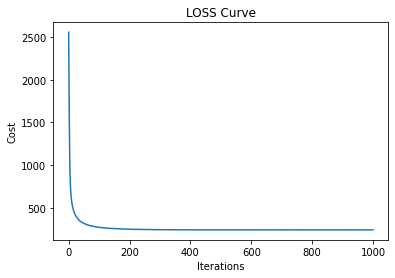

In [5]:
# Finding the hyperparamter value
max_iters = 1000
svc = SVC(lr=0.00001, lambda_param=6, max_iters=max_iters)

costs = svc.fit(train_X, train_y, need_cost=True)

plt.plot(np.linspace(0, max_iters, max_iters), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('LOSS Curve')
plt.show()

In [6]:
# Fit curve for the best parameter 
svc = SVC(lr=0.00001, lambda_param=6, max_iters=50)
svc.fit(train_X, train_y)


# Perfomance on training set

train_pred = svc.predict(train_X)

print(classification_report(train_y, train_pred))

              precision    recall  f1-score   support

          -1       0.97      0.99      0.98       268
           1       0.98      0.96      0.97       158

    accuracy                           0.98       426
   macro avg       0.98      0.97      0.97       426
weighted avg       0.98      0.98      0.98       426



In [7]:
# Performance on test set
test_pred = svc.predict(test_X)

print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

          -1       0.95      1.00      0.97        89
           1       1.00      0.91      0.95        54

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143



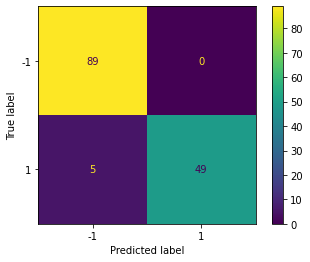

In [8]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_y, test_pred), display_labels=[-1,1]).plot();